In [ ]:
%pip install causal-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.graph.GraphNode import GraphNode
import pydot
from IPython.display import Image, display

In [ ]:
subject_info = pd.read_csv("https://raw.githubusercontent.com/nzhang20/DSC180A/refs/heads/main/datasets/subject_file.csv")
subject_info.head()

SubjectID          Study Race Sex    Age    BMI   SSPG IR_IS_classification
0   ZIS22OE            HMP    C   F    NaN    NaN    NaN              Unknown
1   ZJBOZ2X       Exercise    C   F  65.30  19.82    NaN              Unknown
2   ZJOSZHK            HMP    C   M  41.43  19.42    NaN              Unknown
3   ZJTKAE3            HMP    C   F  58.65  31.24  162.0                   IR
4   ZJXC41N  HMP, Exercise    B   F  49.69  28.24   75.0                   IS

In [ ]:
# merge gut_microbes with subject on subject id
gut_microbes = pd.read_csv("https://raw.githubusercontent.com/nzhang20/DSC180A/refs/heads/main/datasets/gut_16s_abundance.txt", sep = "\t")
# add SubjectID column to gut_microbes
gut_microbes['SubjectID'] = gut_microbes['SampleID'].str.split('-').str[0]
gut_microbes.head()

SampleID  phylum_Actinobacteria  phylum_Bacteroidetes  \
0  ZOZOW1T-1010               0.000449              0.650866   
1  ZOZOW1T-1011               0.000176              0.730518   
2  ZOZOW1T-1012               0.000597              0.178364   
3  ZOZOW1T-1015               0.000058              0.740726   
4  ZOZOW1T-1021               0.001113              0.554580   

   phylum_Firmicutes  phylum_Proteobacteria  phylum_Verrucomicrobia  \
0           0.225080               0.007364                0.015835   
1           0.184808               0.003900                0.008186   
2           0.796861               0.000358                0.002788   
3           0.226516               0.005977                0.001207   
4           0.364195               0.038358                0.000059   

   phylum_unclassified_Bacteria  class_Actinobacteria  class_Bacilli  \
0                      0.097431              0.000449       0.000138   
1                      0.070902              0.000176       0.000070   
2                      0.020911              0.000597       0.000119   
3                      0.024971              0.000058       0.000029   
4                      0.041286              0.001113       0.000059   

   class_Bacteroidia  ...  genus_unclassified_Bacteria  \
0           0.650866  ...                     0.097431   
1           0.730518  ...                     0.070902   
2           0.178364  ...                     0.020911   
3           0.740726  ...                     0.024971   
4           0.554580  ...                     0.041286   

   genus_unclassified_Clostridiales  \
0                          0.007883   
1                          0.008713   
2                          0.022903   
3                          0.013046   
4                          0.006208   

   genus_unclassified_Clostridiales_Incertae.Sedis.XIII  \
0                                           0.000035      
1                                           0.000141      
2                                           0.000518      
3                                           0.000086      
4                                           0.000117      

   genus_unclassified_Coriobacteriaceae  \
0                              0.000415   
1                              0.000176   
2                              0.000398   
3                              0.000029   
4                              0.000176   

   genus_unclassified_Erysipelotrichaceae  genus_unclassified_Firmicutes  \
0                                0.002386                       0.015697   
1                                0.000808                       0.008608   
2                                0.001713                       0.000876   
3                                0.004109                       0.007730   
4                                0.000468                       0.000996   

   genus_unclassified_Lachnospiraceae  genus_unclassified_Porphyromonadaceae  \
0                            0.027452                               0.000000   
1                            0.011805                               0.000000   
2                            0.018362                               0.000000   
3                            0.043849                               0.000029   
4                            0.132584                               0.015753   

   genus_unclassified_Ruminococcaceae  SubjectID  
0                            0.074128    ZOZOW1T  
1                            0.069215    ZOZOW1T  
2                            0.615351    ZOZOW1T  
3                            0.067096    ZOZOW1T  
4                            0.044624    ZOZOW1T  

[5 rows x 98 columns]

In [ ]:
merged_df = pd.merge(gut_microbes, subject_info, on='SubjectID', how='left')
merged_df.head()

SampleID  phylum_Actinobacteria  phylum_Bacteroidetes  \
0  ZOZOW1T-1010               0.000449              0.650866   
1  ZOZOW1T-1011               0.000176              0.730518   
2  ZOZOW1T-1012               0.000597              0.178364   
3  ZOZOW1T-1015               0.000058              0.740726   
4  ZOZOW1T-1021               0.001113              0.554580   

   phylum_Firmicutes  phylum_Proteobacteria  phylum_Verrucomicrobia  \
0           0.225080               0.007364                0.015835   
1           0.184808               0.003900                0.008186   
2           0.796861               0.000358                0.002788   
3           0.226516               0.005977                0.001207   
4           0.364195               0.038358                0.000059   

   phylum_unclassified_Bacteria  class_Actinobacteria  class_Bacilli  \
0                      0.097431              0.000449       0.000138   
1                      0.070902              0.000176       0.000070   
2                      0.020911              0.000597       0.000119   
3                      0.024971              0.000058       0.000029   
4                      0.041286              0.001113       0.000059   

   class_Bacteroidia  ...  genus_unclassified_Porphyromonadaceae  \
0           0.650866  ...                               0.000000   
1           0.730518  ...                               0.000000   
2           0.178364  ...                               0.000000   
3           0.740726  ...                               0.000029   
4           0.554580  ...                               0.015753   

   genus_unclassified_Ruminococcaceae  SubjectID          Study  Race  Sex  \
0                            0.074128    ZOZOW1T  HMP, Exercise     C    M   
1                            0.069215    ZOZOW1T  HMP, Exercise     C    M   
2                            0.615351    ZOZOW1T  HMP, Exercise     C    M   
3                            0.067096    ZOZOW1T  HMP, Exercise     C    M   
4                            0.044624    ZOZOW1T  HMP, Exercise     C    M   

     Age    BMI  SSPG  IR_IS_classification  
0  59.48  21.47  91.5                    IS  
1  59.48  21.47  91.5                    IS  
2  59.48  21.47  91.5                    IS  
3  59.48  21.47  91.5                    IS  
4  59.48  21.47  91.5                    IS  

[5 rows x 105 columns]

In [ ]:
is_df = merged_df[merged_df['IR_IS_classification'] == 'IS']
ir_df = merged_df[merged_df['IR_IS_classification'] == 'IR']

In [ ]:
# include only genuses
genus_cols = [col for col in merged_df.columns if 'genus' in col]
genus_cols

['genus_Akkermansia',
 'genus_Alistipes',
 'genus_Anaerotruncus',
 'genus_Anaerovorax',
 'genus_Bacteroides',
 'genus_Barnesiella',
 'genus_Bilophila',
 'genus_Blautia',
 'genus_Butyricicoccus',
 'genus_Butyricimonas',
 'genus_Clostridium.IV',
 'genus_Clostridium.XI',
 'genus_Clostridium.XVIII',
 'genus_Clostridium.XlVa',
 'genus_Clostridium.XlVb',
 'genus_Clostridium.sensu.stricto',
 'genus_Collinsella',
 'genus_Coprococcus',
 'genus_Dorea',
 'genus_Eggerthella',
 'genus_Erysipelotrichaceae_incertae_sedis',
 'genus_Faecalibacterium',
 'genus_Flavonifractor',
 'genus_Holdemania',
 'genus_Lachnospiracea_incertae_sedis',
 'genus_Odoribacter',
 'genus_Oscillibacter',
 'genus_Parabacteroides',
 'genus_Parasutterella',
 'genus_Phascolarctobacterium',
 'genus_Prevotella',
 'genus_Pseudoflavonifractor',
 'genus_Roseburia',
 'genus_Ruminococcus',
 'genus_Streptococcus',
 'genus_Veillonella',
 'genus_unclassified_Bacteria',
 'genus_unclassified_Clostridiales',
 'genus_unclassified_Clostridiales

In [ ]:
# data cleaning
full_df = merged_df[genus_cols]
is_df = is_df[genus_cols]
ir_df = ir_df[genus_cols]

In [ ]:
# data input for FCI must be numpy array
full_data = np.array(full_df)
is_data = np.array(is_df)
ir_data = np.array(ir_df)

In [ ]:
# FCI for all

from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(full_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=full_df.columns)
pdy.write_png('full_simple_test.png')


  0%|          | 0/45 [00:00<?, ?it/s]

X3 --> X10
X3 --> X26
X3 --> X45
X4 --> X39
X45 --> X5
X14 --> X8
X19 --> X8
X16 --> X40
X43 --> X22
X43 --> X25
X32 --> X28
X37 --> X42


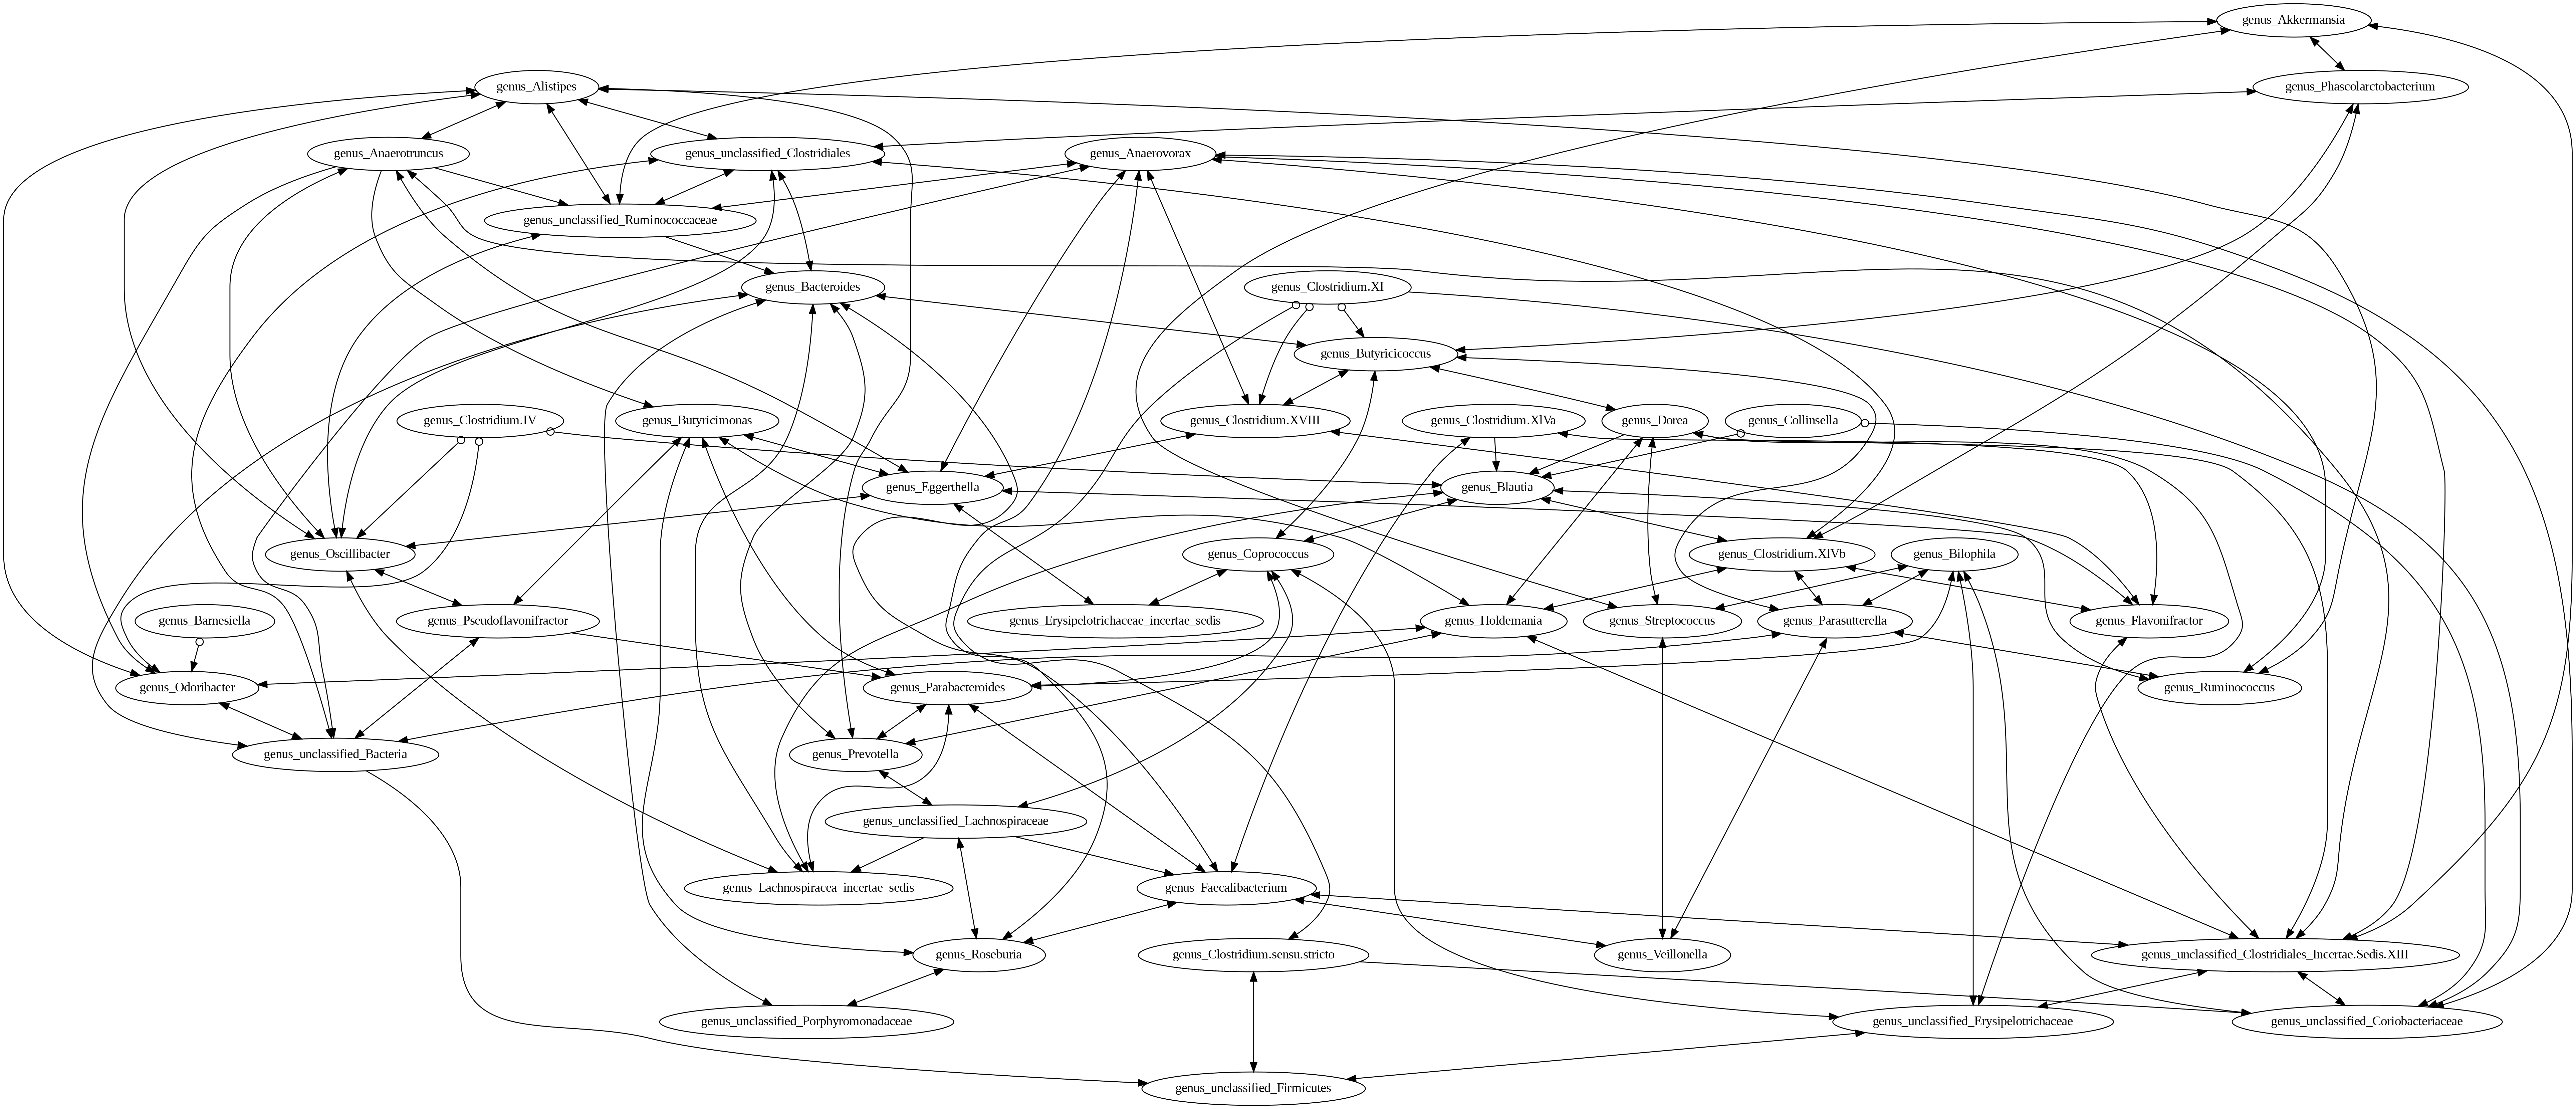

In [ ]:
from IPython.display import Image

# Display image in notebook
Image("full_simple_test.png")

In [ ]:
# IS FCI

from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(is_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=is_df.columns)
pdy.write_png('is_simple_test.png')


  0%|          | 0/45 [00:00<?, ?it/s]

X3 --> X4
X10 --> X3
X3 --> X27
X4 --> X39
X45 --> X5
X8 --> X17
X19 --> X8
X8 --> X25
X8 --> X41
X9 --> X40
X10 --> X20
X11 --> X22
X14 --> X15
X17 --> X30
X17 --> X39
X17 --> X40
X18 --> X43
X19 --> X24
X39 --> X19
X20 --> X21
X20 --> X23
X45 --> X27
X31 --> X37
X33 --> X43


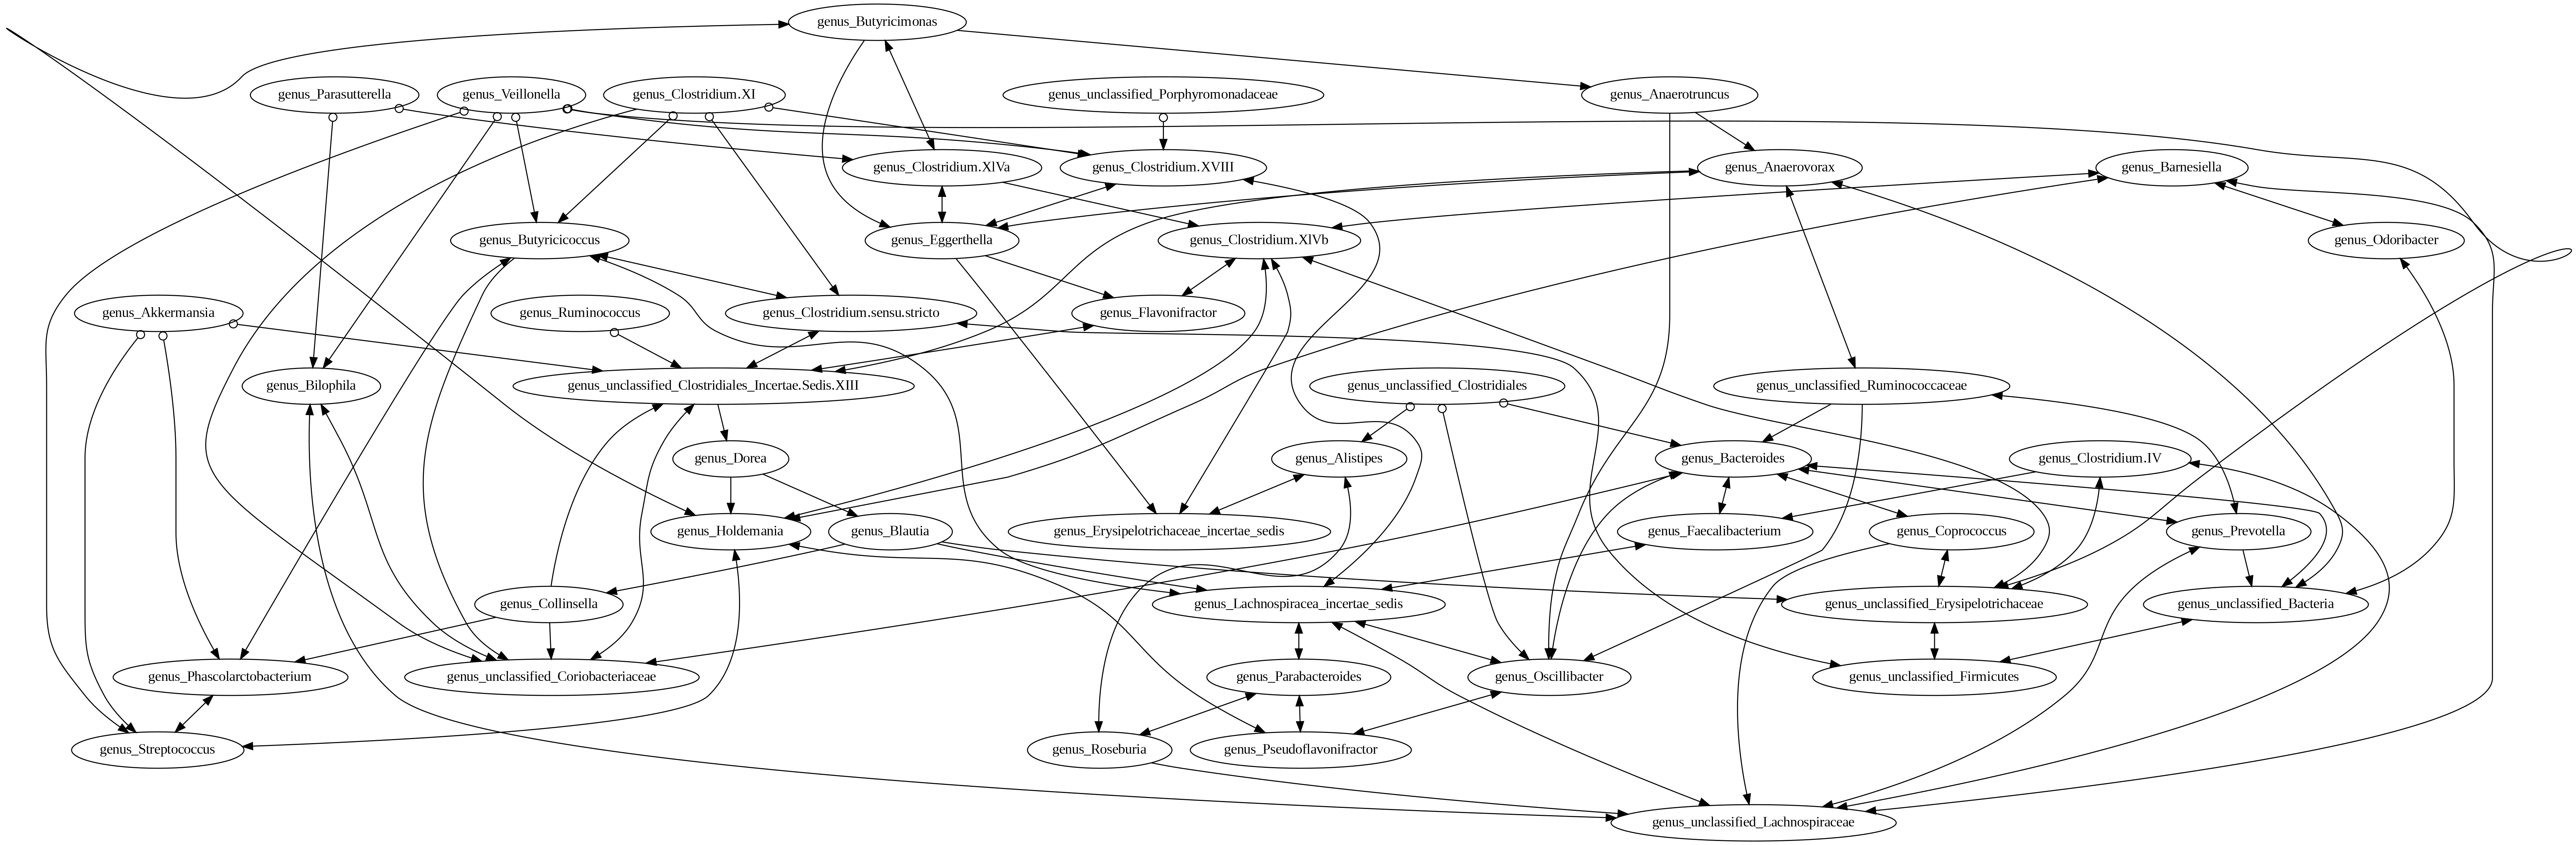

In [ ]:
from IPython.display import Image

# Display image in notebook
Image("is_simple_test.png")


In [ ]:
from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(ir_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=ir_df.columns)
pdy.write_png('ir_simple_test.png')


  0%|          | 0/45 [00:00<?, ?it/s]

X45 --> X1
X2 --> X45
X3 --> X32
X45 --> X3
X42 --> X5
X45 --> X5
X19 --> X8
X9 --> X19
X42 --> X9
X39 --> X19
X19 --> X40
X41 --> X19
X20 --> X40
X32 --> X37
X41 --> X34
X38 --> X45
X39 --> X41


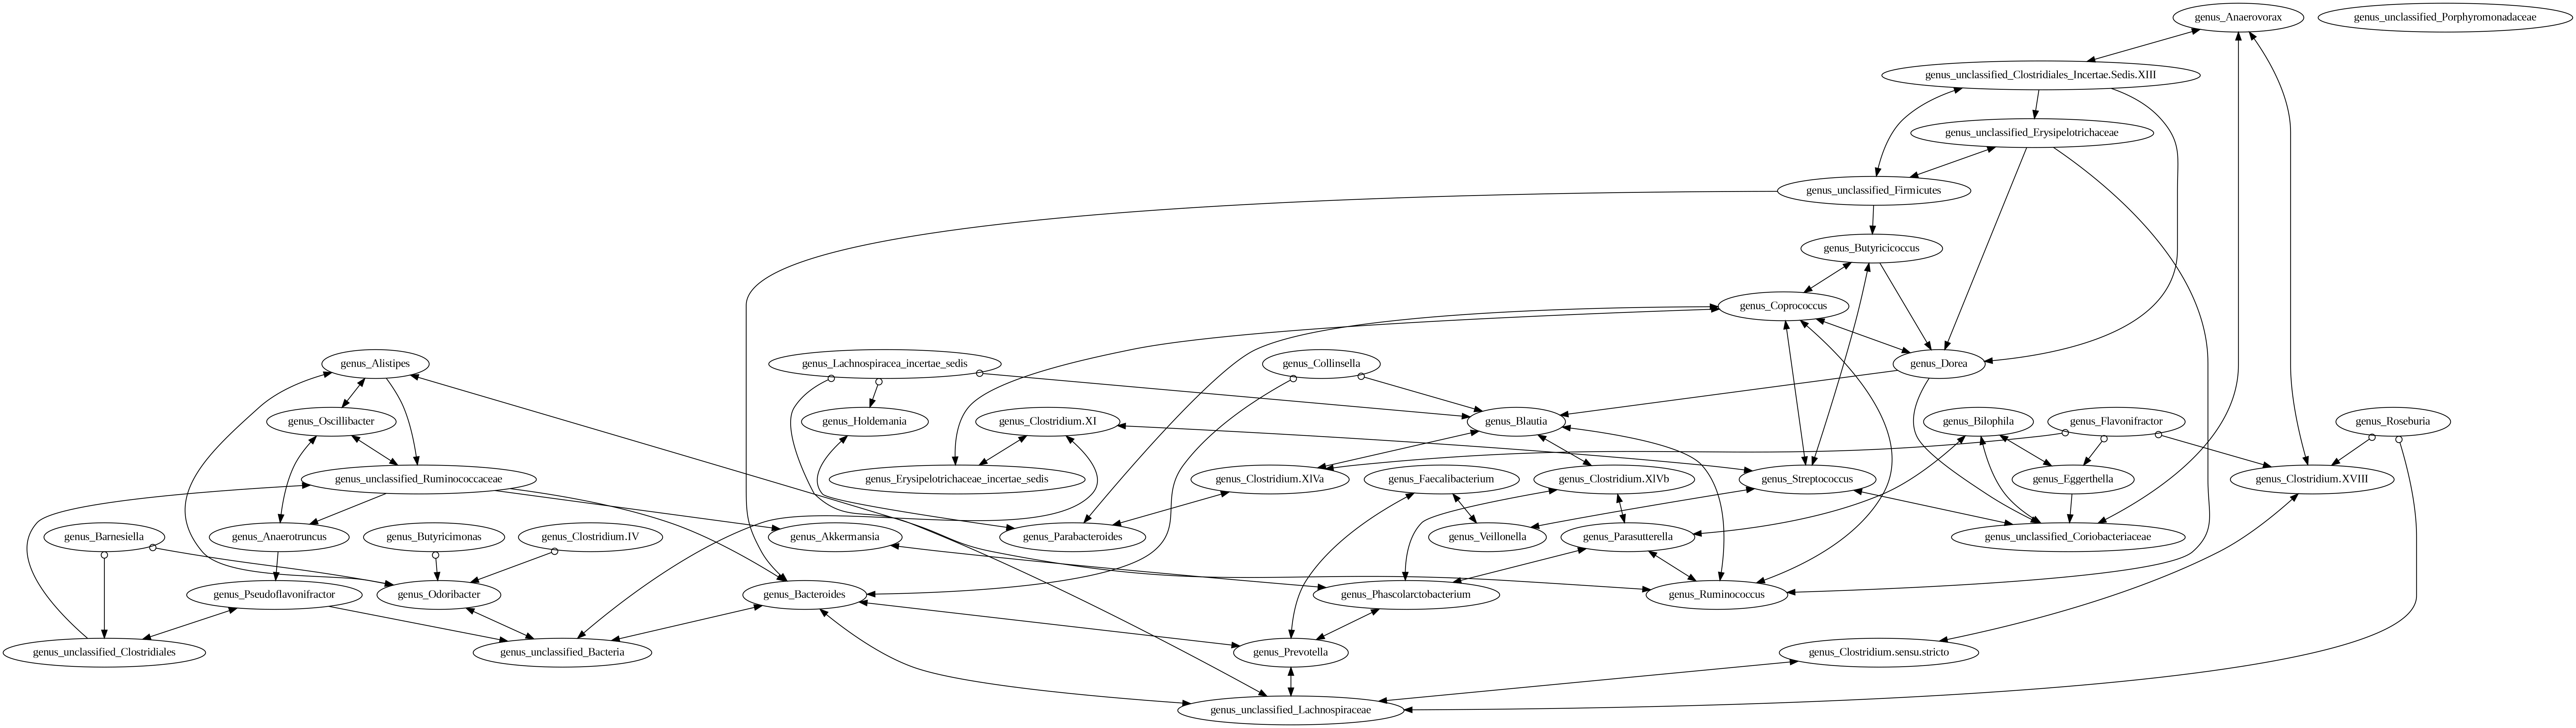

In [ ]:
from IPython.display import Image

# Display image in notebook
Image("ir_simple_test.png")
